In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [9]:
df = pd.read_csv('homeprices.csv')
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,NaN,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


Text(0, 0.5, 'price')

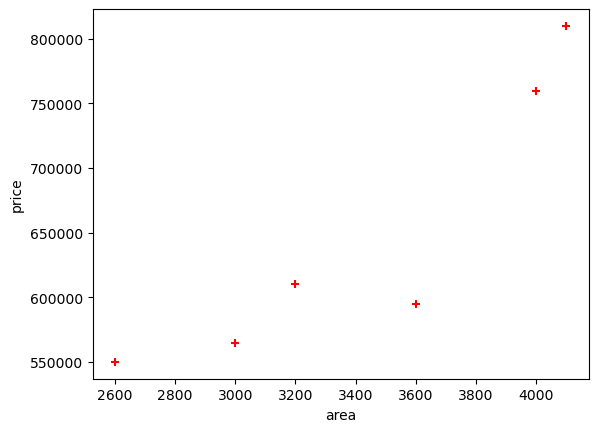

In [41]:
plt.scatter(df.area,df.price,color='red',marker='+')
plt.xlabel('area')
plt.ylabel('price')

In [17]:
import math
median_bedrooms = math.floor(df.bedrooms.median())
median_bedrooms

4

In [23]:
df.bedrooms = df.bedrooms.fillna(median_bedrooms)
df

,area,bedrooms,age,price
0,2600,3.0,20,550000
1,3000,4.0,15,565000
2,3200,4.0,18,610000
3,3600,3.0,30,595000
4,4000,5.0,8,760000
5,4100,6.0,8,810000


In [25]:
lr = LinearRegression()
lr.fit(df[['area','bedrooms','age']],df.price)

LinearRegression()

In [27]:
lr.coef_, lr.intercept_

(array([  112.06244194, 23388.88007794, -3231.71790863]), 221323.00186540408)

In [55]:
lr.predict([[3000,4,15]])

E:\anaconda\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([602590.07937407])